# **Diabetes 130 US hospitals for years 1999-2008**

"The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

It is an inpatient encounter (a hospital admission).
It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
Laboratory tests were performed during the encounter.
Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc."

**Step 1** - import library

**Objective**: for loading, preprocessing and EDA

**Action Taken** : import pandas, numpy, seaborn, matplotlib, statsmodel, warnings

In [ ]:
#Import library we are going to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

**Step 2** - load dataset

**Objective**: for analysis dataset

**Action Taken** : read_csv

In [ ]:
#reading the dataset
df = pd.read_csv('/content/diabetic_data.csv')
df.sample(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
64704,180027546,79934994,Caucasian,Female,[80-90),?,1,3,7,5,...,No,Down,No,No,No,No,No,Ch,Yes,>30
16370,61552950,78390108,Caucasian,Female,[80-90),?,1,22,7,6,...,No,No,No,No,No,No,No,No,Yes,NO
16996,63083076,23430249,Caucasian,Female,[80-90),?,5,3,17,12,...,No,Up,No,No,No,No,No,Ch,Yes,NO
81853,254258376,92273679,Caucasian,Male,[80-90),?,2,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
100261,423678524,79485723,Caucasian,Female,[80-90),?,1,3,7,5,...,No,No,No,No,No,No,No,No,Yes,NO
40564,125873622,23624514,Caucasian,Female,[70-80),?,1,1,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
69592,198016014,87092793,Caucasian,Male,[70-80),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO
28509,93478038,2915991,?,Female,[80-90),?,2,1,9,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
83921,263567436,33852600,Caucasian,Female,[80-90),?,1,3,7,14,...,No,Steady,No,No,No,No,No,No,Yes,NO
12230,49949964,4922199,Caucasian,Male,[70-80),?,1,18,7,5,...,No,No,No,No,No,No,No,No,No,NO


there are several notes from those table
1. some races have values (?)
2. some weight have values (?)

**Step 3** - get info about dataset

**Objective**: for analysis dataset

**Action Taken**: df.info()

In [ ]:
#to give the glimpse of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

This dataset contains 101,766 inpatient records for diabetes patients from 130 hospitals in the US (1999–2008) with 50 columns.

Data Types:

13 numeric columns (int64)

37 categorical columns (object)


There are missing values in column  max_glu_serum and A1Cresult, meanwhile weight and race have unwanted value (?)

**Step 4** - Change Data Types

**Objective**: for easy interpretation age column,
               changing data types for medical columns for low memory and for EDA

**Action Taken**: df['age'] = df['age'].str.extract('(\d+)').astype(float) +5

                  df[drug_cols] = df[drug_cols].astype('category')
                  df[categorical_cols] = df[categorical_cols].astype('category')

# Change Data Types

In [ ]:
#change age from ex:[20-30] to middle value 25
df['age'] = df['age'].str.extract('(\d+)').astype(float)  # extract midpoint number
df['age'] = df['age'] + 5  # optional: make it represent the mid of the range, e.g., 75 for [70-80)

# Convert categorical ID columns
categorical_cols = ['admission_type_id', 'discharge_disposition_id',
                    'admission_source_id', 'payer_code', 'medical_specialty']
df[categorical_cols] = df[categorical_cols].astype('category')

# Convert drug-related columns to category
drug_cols = df.columns[24:49]  # all medication columns
df[drug_cols] = df[drug_cols].astype('category')

# Check updated data types
df.dtypes.head(15)


,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,float64
weight,object
admission_type_id,category
discharge_disposition_id,category
admission_source_id,category
time_in_hospital,int64


all medical related column [24:49] have been changed into categorical data types.

**Step 5** - Check Missing Value

**Objective**: checking NaN in every column

**Action Taken**: df.isna().sum()

# Missing Value Checking

In [ ]:
#identification missing NaN
df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


from this information we know that max_glu_serum and A1Cresult due to this 2 columns so important for analysis and machine learning we change NaN into Unknown rather than we delete the column.

**Step 6** - Handling Missing Value in column max_glu_serum

**Objective**: Change NaN into Unknown

**Action Taken**: df['max_glu_serum'] = df['max_glu_serum'].fillna('Unknown')

#handling max glu serum column

In [ ]:
#i want to know proportion NaN in max_glu_serum
df['max_glu_serum'].value_counts(normalize=True, dropna=False) * 100

,proportion
max_glu_serum,
NaN,94.746772
Norm,2.551933
>200,1.459230
>300,1.242065


NaN in this column have 94.74% proportion to data, however due to this data can be useful eventhough in small proportion. so i keep this data dan change NaN into Unknown.

In [ ]:
#change NaN into Unknown
df['max_glu_serum'] = df['max_glu_serum'].fillna('Unknown')

In [ ]:
#rechecking NaN again
df['max_glu_serum'].value_counts(normalize=True, dropna=False) * 100

,proportion
max_glu_serum,
Unknown,94.746772
Norm,2.551933
>200,1.459230
>300,1.242065


NaN has been change into Unknown

**Step 7** - Handling Missing Value in column A1Cresult

**Objective**: Change NaN into Unknown

**Action Taken**: df['A1Cresult'] = df['A1Cresult'].fillna('Unknown')

#handling A1Cresult Column

In [ ]:
#i want to know proportion NaN in A1Cresult column
df['A1Cresult'].value_counts(normalize=True, dropna=False) * 100

,proportion
A1Cresult,
NaN,83.277322
>8,8.073423
Norm,4.903406
>7,3.745848


NaN in this column have 83.27% proportion to the data, however due to this data can be useful eventhough in small proportion. so i keep this data dan change NaN into Unknown.

In [ ]:
#change NaN into Unknown
df['A1Cresult'] = df['A1Cresult'].fillna('Unknown')

In [ ]:
#rechecking NaN again
df['A1Cresult'].value_counts(normalize=True, dropna=False) * 100

,proportion
A1Cresult,
Unknown,83.277322
>8,8.073423
Norm,4.903406
>7,3.745848


**Step 8** - Detection hidden missing

**Objective**: to get information about (?, Unknown,  , -, .,) in every column

**Action Taken**: for col in df.columns:

    print(f"{col}: {df[col].unique()[:10]}")

# Detection "hidden missing"

hidden missing is type of data that contains (space, ?, Unknown, None, Null). to handle this we need to show all the unique value in all columns.

In [ ]:
#showing all unique value to find hidden missing data
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")

encounter_id: [2278392  149190   64410  500364   16680   35754   55842   63768   12522
   15738]
patient_nbr: [  8222157  55629189  86047875  82442376  42519267  82637451  84259809
 114882984  48330783  63555939]
race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: [ 5. 15. 25. 35. 45. 55. 65. 75. 85. 95.]
weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id: [6, 1, 2, 3, 4, 5, 8, 7]
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]
discharge_disposition_id: [25, 1, 3, 6, 2, 5, 11, 7, 10, 4]
Categories (26, int64): [1, 2, 3, 4, ..., 24, 25, 27, 28]
admission_source_id: [1, 7, 2, 4, 5, 6, 20, 3, 17, 8]
Categories (17, int64): [1, 2, 3, 4, ..., 17, 20, 22, 25]
time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10]
payer_code: ['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM']
Categories (18, object): ['?', 'BC', 'CH', 'CM', ..., 'SI', 'SP', 'UN', '

race has hidden missing (?)

gender unknown/invalid

medical specialty

payer code

diag_2
diag_3

**Step 9** - Handling race column

**Objective**: change ? into unknwon for Machine Learning and EDA

**Action Taken**: df['race'] = df['race'].replace('?', 'Unknown')

# Handling race column

In [ ]:
#i want to see the proportion of every value count in race columns
df['race'].value_counts(normalize=True, dropna=False) * 100

,proportion
race,
Caucasian,74.778413
AfricanAmerican,18.876639
?,2.233555
Hispanic,2.001651
Other,1.479866
Asian,0.629876


There are 2.23 % missing values as '?'

i will change into Unknown

In [ ]:
#change NaN into Unknown
df['race'] = df['race'].replace('?', 'Unknown')
df['race'].value_counts(normalize=True, dropna=False) * 100

,proportion
race,
Caucasian,74.778413
AfricanAmerican,18.876639
Unknown,2.233555
Hispanic,2.001651
Other,1.479866
Asian,0.629876


Value ? has been change into Unknown

**Step 10** - Drop Unknown/Invalid from gender column

**Objective**: drop Unknwon/Invalid for Machine Learning and EDA

**Action Taken**: df['gender'] = df['gender'].replace('Unknown/Invalid', np.nan)

                  df = df.dropna(subset=['gender'])

# Handling gender column

In [ ]:
#i want to see the proportion of data unknown/invalid in gender column
df['gender'].value_counts()

,count
gender,
Female,54708
Male,47055
Unknown/Invalid,3


we have 3 Unknown/invalid data that we need to remove

In [ ]:
#Drop Unknown/invalid from gender column
df['gender'] = df['gender'].replace('Unknown/Invalid', np.nan) #change Unknown/Invalid to NaN
df = df.dropna(subset=['gender']) #drop NaN in column gender

In [ ]:
#rechecking gender column
df['gender'].value_counts()

,count
gender,
Female,54708
Male,47055


the number of Female and Male same, but Unknown/Invalid has been removed.

**Step 11** - Drop weight column

**Objective**: drop weight column, because contains 96% missing value

**Action Taken**: df = df.drop(columns=['weight'])

# Handling Weight Column

In [ ]:
df['weight'].value_counts(normalize=True, dropna=False) * 100

,proportion
weight,
?,96.858387
[75-100),1.312854
[50-75),0.881460
[100-125),0.614172
[125-150),0.142488
[25-50),0.095320
[0-25),0.047168
[150-175),0.034394
[175-200),0.010809


weight column contains 96.85% missing values as ('?') so i need to drop the column. because weight is not medical related merely demographic factors that can be replaced/subtitute with another demographic columns.

In [ ]:
#drop weight column
df = df.drop(columns=['weight'])

In [ ]:
#rechecking the weight column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101763 non-null  int64   
 1   patient_nbr               101763 non-null  int64   
 2   race                      101763 non-null  object  
 3   gender                    101763 non-null  object  
 4   age                       101763 non-null  float64 
 5   admission_type_id         101763 non-null  category
 6   discharge_disposition_id  101763 non-null  category
 7   admission_source_id       101763 non-null  category
 8   time_in_hospital          101763 non-null  int64   
 9   payer_code                101763 non-null  category
 10  medical_specialty         101763 non-null  category
 11  num_lab_procedures        101763 non-null  int64   
 12  num_procedures            101763 non-null  int64   
 13  num_medications           101763 n

weight column has been remove

**Step 12** - Handling medical specialty column

**Objective**: Change ? into Unknown in medical specialty column

**Action Taken**: df['medical_specialty'] = df['medical_specialty'].replace('?', 'Unknown')

# Handling medical_specialty Column

In [ ]:
#i want to see the proportion of each values in medical specialty column
df['medical_specialty'].value_counts(normalize=True, dropna=False) * 100

,proportion
medical_specialty,
?,49.081690
InternalMedicine,14.381455
Emergency/Trauma,7.433940
Family/GeneralPractice,7.311105
Cardiology,5.258296
...,...
Proctology,0.000983
Psychiatry-Addictive,0.000983
Speech,0.000983


Based on the data above we know that value "?" contains 49% data, due to the important of this data to see clear view of how the patient enter the hospital so we need to keep the column and change value ? to Unknown

In [ ]:
#replace value '?' to Unknown
df['medical_specialty'] = df['medical_specialty'].replace('?', 'Unknown')

In [ ]:
#rechecking medical specialty column again
df['medical_specialty'].value_counts(normalize=True, dropna=False) * 100

,proportion
medical_specialty,
Unknown,49.081690
InternalMedicine,14.381455
Emergency/Trauma,7.433940
Family/GeneralPractice,7.311105
Cardiology,5.258296
...,...
Proctology,0.000983
Psychiatry-Addictive,0.000983
Speech,0.000983


Medical specialty with value "?" has been changed into Unknown

**Step 13** - Handling diag 1,2,3

**Objective**: Change ? into Unknown in diag 1,2,3 column

**Action Taken**: df[diag_cols] = df[diag_cols].replace('?', 'Unknown')

# Handling diag_column

In [ ]:
#i want to check missing value in diag_column
diag_cols = ['diag_1', 'diag_2', 'diag_3']

for col in diag_cols:
    count = (df[col] == '?').sum()
    percent = (count / len(df)) * 100
    print(f"{col}: {count} missing ({percent:.2f}%)")

diag_1: 21 missing (0.02%)
diag_2: 358 missing (0.35%)
diag_3: 1423 missing (1.40%)


In [ ]:
# changing value '?' with 'Unknown' in all columns diag
diag_cols = ['diag_1', 'diag_2', 'diag_3']
df[diag_cols] = df[diag_cols].replace('?', 'Unknown')

# rechecking again whether the value '?' is still there
for col in diag_cols:
    count = (df[col] == '?').sum()
    print(f"{col}: {count} missing (after filling)")

diag_1: 0 missing (after filling)
diag_2: 0 missing (after filling)
diag_3: 0 missing (after filling)


**Step 14** - Handling payer code column

**Objective**: Change ? into Unknown in payer code column

**Action Taken**: df['payer_code'] = df['payer_code'].replace('?', 'Unknown')

# Handling payer_code column

In [ ]:
#checking value count in payer_code column
df['payer_code'].value_counts(normalize=True, dropna=False) * 100

,proportion
payer_code,
?,39.557600
MC,31.877008
HM,6.165306
SP,4.920256
BC,4.574354
MD,3.470810
CP,2.487152
UN,2.405589
CM,1.903442


we have 33.55% value '?' that we need to change into Unknown

In [ ]:
#replace value '?' in payer_code column to Unknown
df['payer_code'] = df['payer_code'].replace('?', 'Unknown')

In [ ]:
#rechecking value count in payer_code column
df['payer_code'].value_counts(normalize=True, dropna=False) * 100

,proportion
payer_code,
Unknown,39.557600
MC,31.877008
HM,6.165306
SP,4.920256
BC,4.574354
MD,3.470810
CP,2.487152
UN,2.405589
CM,1.903442


the value of '?' in payer_code column has been changed into 'Unknown'

**Step 15** - Checking readmitted column

**Objective**: to make sure the column is clean

**Action Taken**: df['readmitted'].value_counts(normalize=True, dropna=False)*100

# Checking readmitted column

In [ ]:
#due to this analysis focus on admitted, so i want to make sure all data in readmitted column are clean
df['readmitted'].value_counts(normalize=True, dropna=False)*100

,proportion
readmitted,
NO,53.910557
>30,34.929198
<30,11.160245


In [ ]:
#i want to check based on unique value
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
#i want to check whether this column has empty data
df['readmitted'].isna().sum()

np.int64(0)

readmitted column is clean

**Step 16** - Feature Engineering

**Objective**: for machine learning,EDA and simplify code

**Action Taken**: df['readmitted_flag'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Feature Engineering

In [ ]:
#convert data readmitted into 1 and 0 for machine learning purpose
# Convert target variable
df['readmitted'] = df['readmitted'].astype('category')
df['readmitted_flag'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

**Step 17** - Check the proportion of readmitted column

**Objective**: for insight

**Action Taken**: print(df['readmitted_flag'].value_counts(normalize=True)*100)

# Check The Proportion of Readmitted

In [ ]:
#checking proportion of 1 and 0 in column readmited_flag
print("The Proportion:")
print(df['readmitted_flag'].value_counts(normalize=True)*100)

The Proportion:
readmitted_flag
0    88.839755
1    11.160245
Name: proportion, dtype: float64


**Step 18** - EDA Visualization

**Objective**: for insight

**Action Taken**: eda_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']

# VISUALIZATION EDA

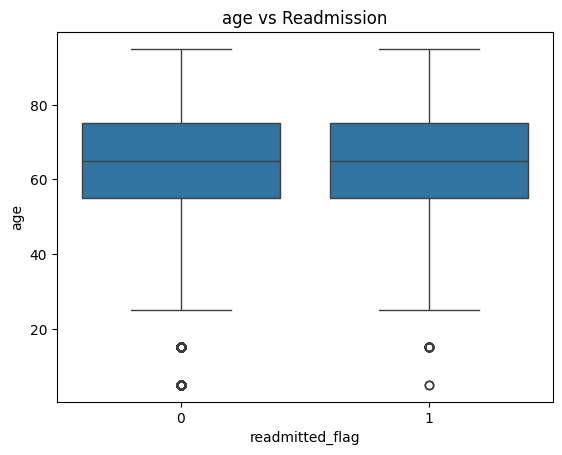

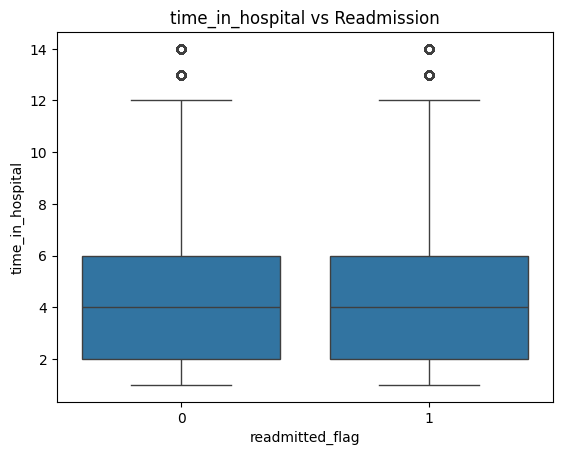

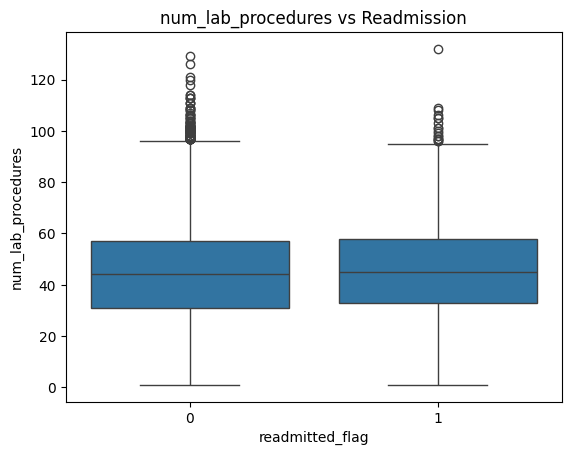

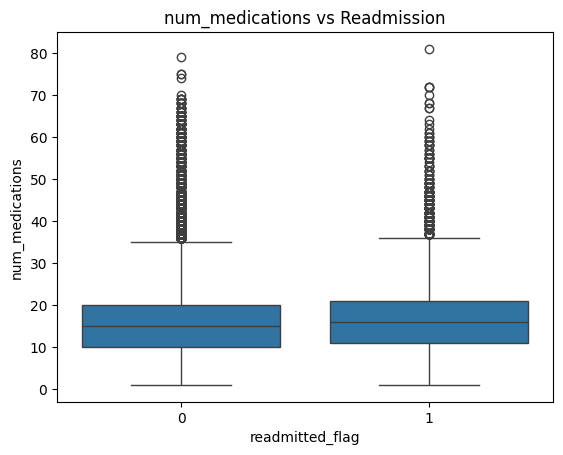

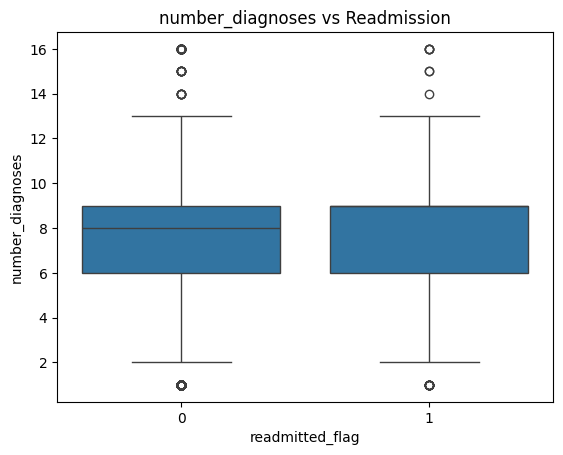

In [ ]:
#i want to see by boxplot the median and outlier of column age, time_in_hospital, num_lab_procedures,num_medications,number_diagnoses
eda_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
for col in eda_cols:
    sns.boxplot(x='readmitted_flag', y=col, data=df)
    plt.title(f'{col} vs Readmission')
    plt.show()

**insight**

**Age column**
we can see that from boxplot the median value for both readmitted patient and not readmitted patient are 65 years old, and few patient have age below 20 years old.

**time_in_hospital**
we can see that from boxplot the median value for both readmitted patient and not readmitted patient stay in hospital for 4 days, and few patient have stayed in hospital for 13-14 days.

**num_lab_procedures**
we can see that from boxplot the median value for both readmitted patient and not readmitted patient are around 45 lab_procedures, and some patients have conducted lab_procedures for 100-120. i think it is still make sense for patient conducted many lab procedures because this data contains record for 8 years, and diabtics patient cannot be cured, and always taking lab test every month. so i keep the outlires as it is.

**num_medication**
we can see that from boxplot the median value for both readmitted patient and not readmitted patient are 13-15 medication per patient, however there are some patients receive 35-80 medication, indicating treatment complexity. i think due to diabetic related to another disease such as CKG, Heart failure, infection, hipertension. and patient diabetics always get adjustment to their diseage so it is still possible that one patient can receive 80 adjustment medication.

**num diagnoses**
we can see that from boxplot the median value for readmitted patient are 8, and for not readmitted not show, and there are outliers for number diagnoses reach 14-16 diagnoses, which i think still make sense.

**Step 19** - Readmission distribution visualization

**Objective**: for insight

**Action Taken**: shows below

# READMISSION DISTRIBUTION

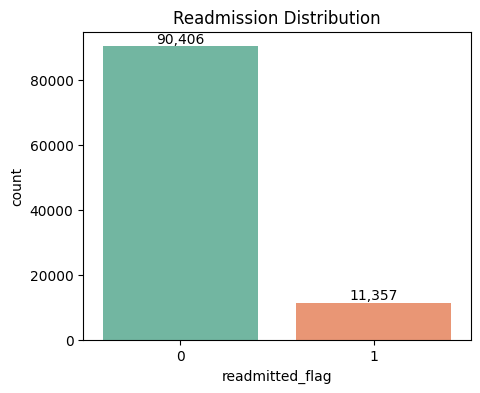

Readmission count (<30 hari): 11.16%


In [ ]:
#i want to know the proportion of readmission distribution with bar chart
plt.figure(figsize=(5,4))
ax = sns.countplot(x='readmitted_flag', data=df, palette='Set2')
plt.title('Readmission Distribution')

# add data label
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}',                     # format number in thousand
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

# count persentage patient <30 hari
readmit_rate = df['readmitted_flag'].mean() * 100
print(f"Readmission count (<30 hari): {readmit_rate:.2f}%")

Insight:
Patient with label No and >30 have the value more than <30.

This shows that the majority of patients either recovered or had a long readmission interval.



**Step 20** - Readmission vs gender visualization

**Objective**: for insight

**Action Taken**: shows below

# GENDER VS READMISSION

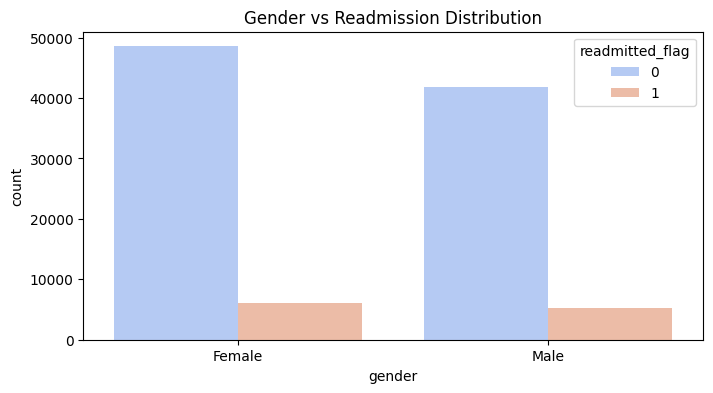

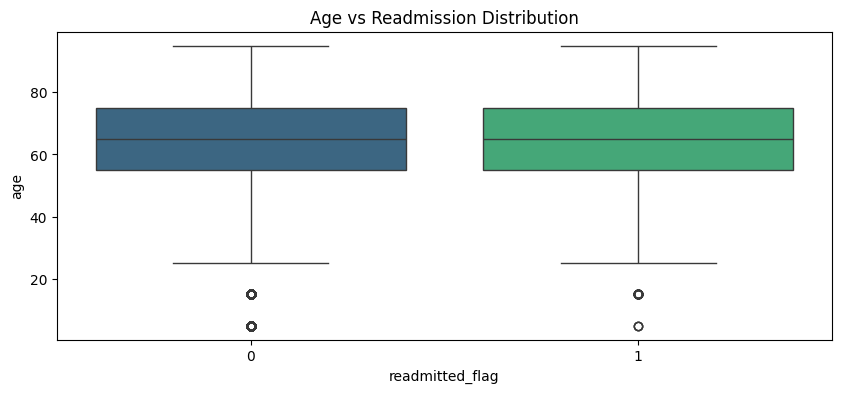

In [ ]:
#i want to know the proportion of gender by readmission distribution with bar chart
plt.figure(figsize=(8,4))
sns.countplot(x='gender', hue='readmitted_flag', data=df,
palette='coolwarm')
plt.title('Gender vs Readmission Distribution')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='readmitted_flag', y='age', data=df, palette='viridis')
plt.title('Age vs Readmission Distribution')
plt.show()

In [ ]:
#i want to know the proportion and certain number for gender column
gender_readmission_counts = pd.crosstab(df['gender'], df['readmitted'])
gender_readmission_counts

readmitted,<30,>30,NO
gender,,,
Female,6152,19518,29038
Male,5205,16027,25823


**insight**
Female patients have slightly bigger number for both readmitted 0 and 1 compared to male.

Age for both female and male have same median (65 years old) and outliers below 20 years old

In [ ]:
age_readmission_stats = df.groupby('readmitted_flag')['age'].describe()
age_readmission_stats

,count,mean,std,min,25%,50%,75%,max
readmitted_flag,,,,,,,,
0,90406.0,65.867199,15.957819,5.0,55.0,65.0,75.0,95.0
1,11357.0,66.760148,15.784953,5.0,55.0,65.0,75.0,95.0


Insight gender:
women are more likely to be readmitted after 30 days than men

Insight age:
elderly patients (60-70 years old) are more susceptible to readmission

**Step 21** - Numeric Medical Distribution

**Objective**: for insight of median, outliers, min and max value

**Action Taken**: shows below

# Numeric Medical Distribution

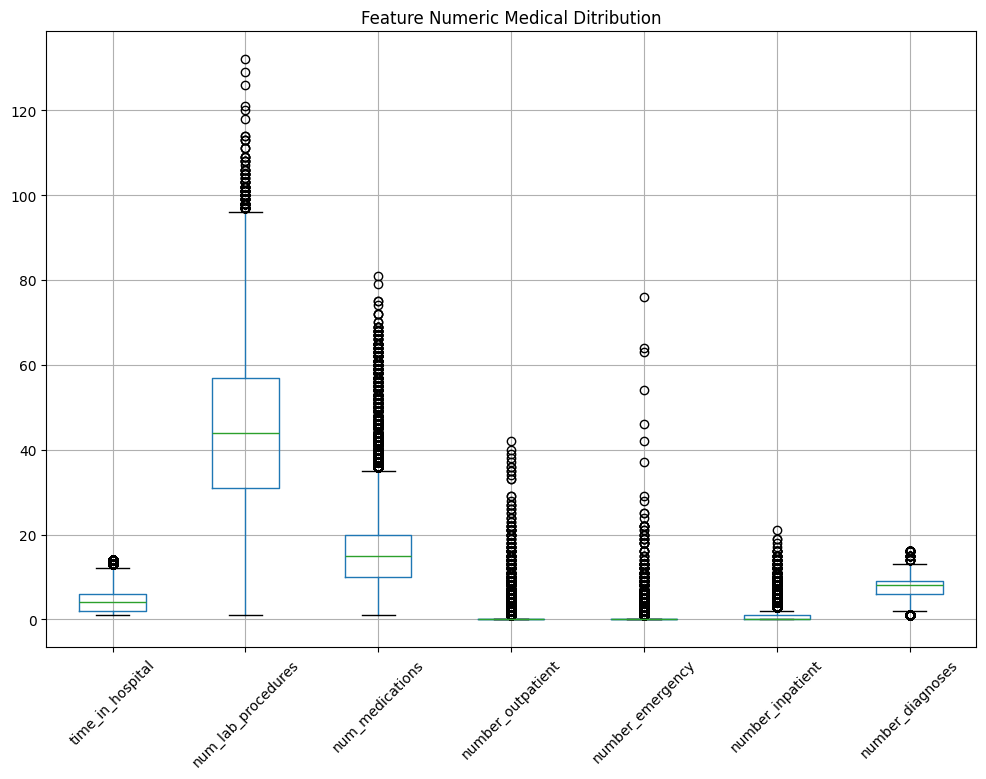

Median values for numeric columns:

time_in_hospital       4.0
num_lab_procedures    44.0
num_medications       15.0
number_outpatient      0.0
number_emergency       0.0
number_inpatient       0.0
number_diagnoses       8.0
dtype: float64


In [ ]:
#i want to see boxplot for each medical distribution
num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

plt.figure(figsize=(12,8))
df[num_cols].boxplot(rot=45)
plt.title('Feature Numeric Medical Ditribution')
plt.show()

median_values = df[num_cols].median()
print("Median values for numeric columns:\n")
print(median_values)


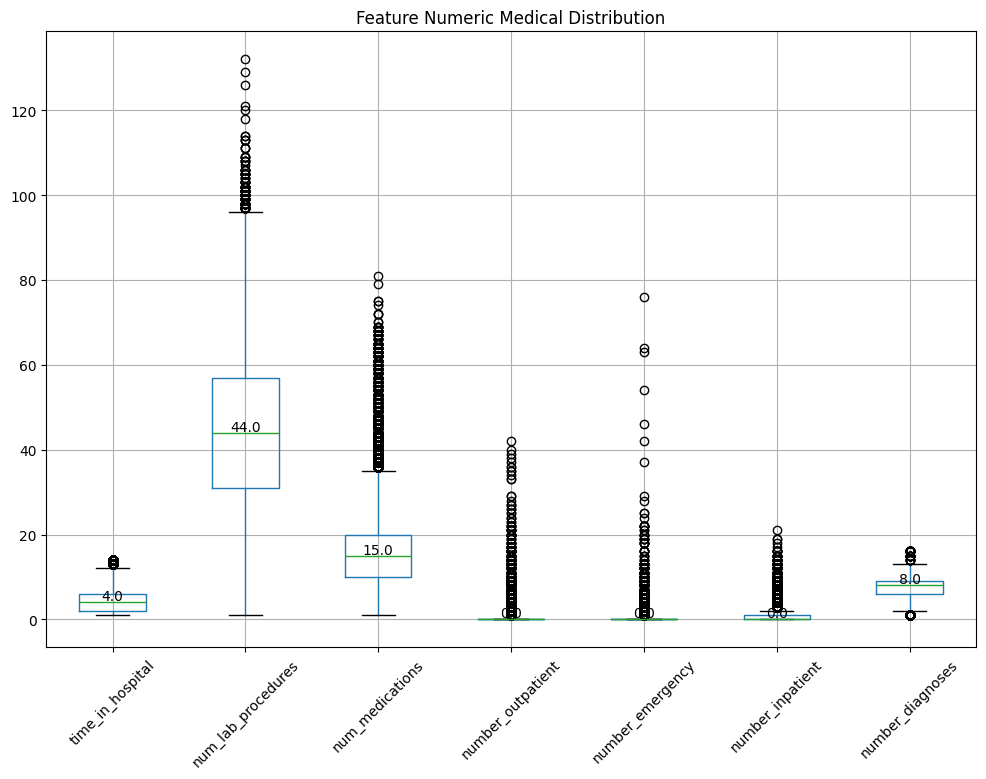

In [ ]:
plt.figure(figsize=(12,8))
boxplot = df[num_cols].boxplot(rot=45)
plt.title('Feature Numeric Medical Distribution')

# Tambahkan label median di atas masing-masing box
medians = df[num_cols].median()
for i, col in enumerate(num_cols):
    plt.text(i + 1, medians[col] + 0.5,   # posisi label (x, y)
             f'{medians[col]:.1f}',       # format angka median
             horizontalalignment='center', color='black', fontsize=10)

plt.show()

Insight:

Time_in_hospital (length of stay) is relatively short, with a median of around 4-6 days.

Number_lab_procedures contains significant outliers.

Number_medications also varies quite a bit, with a median of around 10-12 medications.

Number_outpatient, number_emergency, and number_inpatient are mostly low (many 0s) but do contain outliers.

Number_diagnoses averages 4-6 diagnoses per patient.


**Step 22** - Correlation Numeric Medical Distribution

**Objective**: for insight of correlation for each numerical medical column with readmitted column

**Action Taken**: shows below

# Correlation between Numerical Distribution

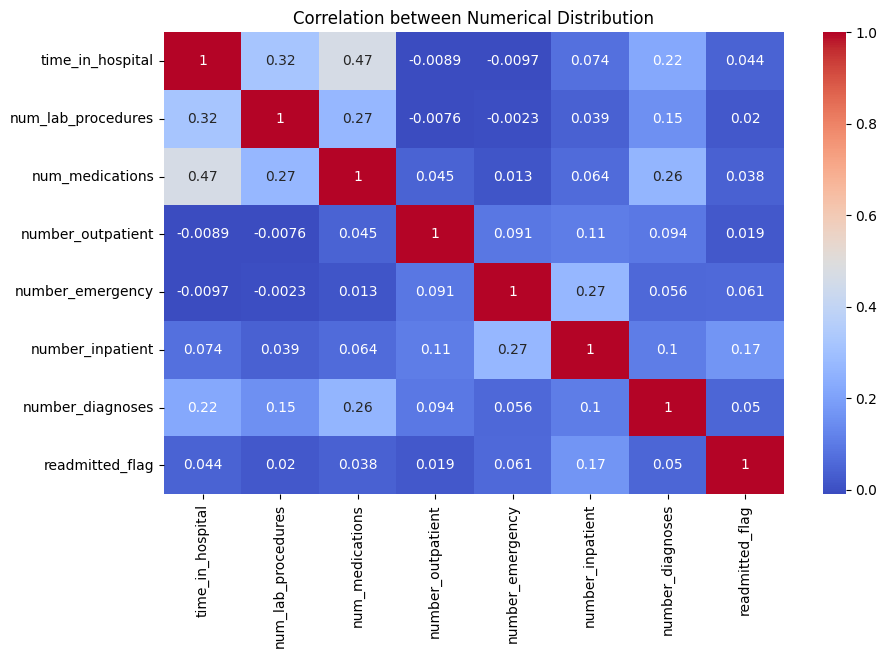

In [ ]:
#i want to see the correlation for each medical colums to readmitted column
#Correlation with heat map
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['readmitted_flag']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Distribution')
plt.show()


Insight:

There is no single variable that significantly determines readmission, the phenomenon is multifactorial.

continue to feature importance

**Step 23** - Medical Specialty Visualization

**Objective**: for viisualization of how patient enter hospital

**Action Taken**: shows below

# Medical Specialty Visualization

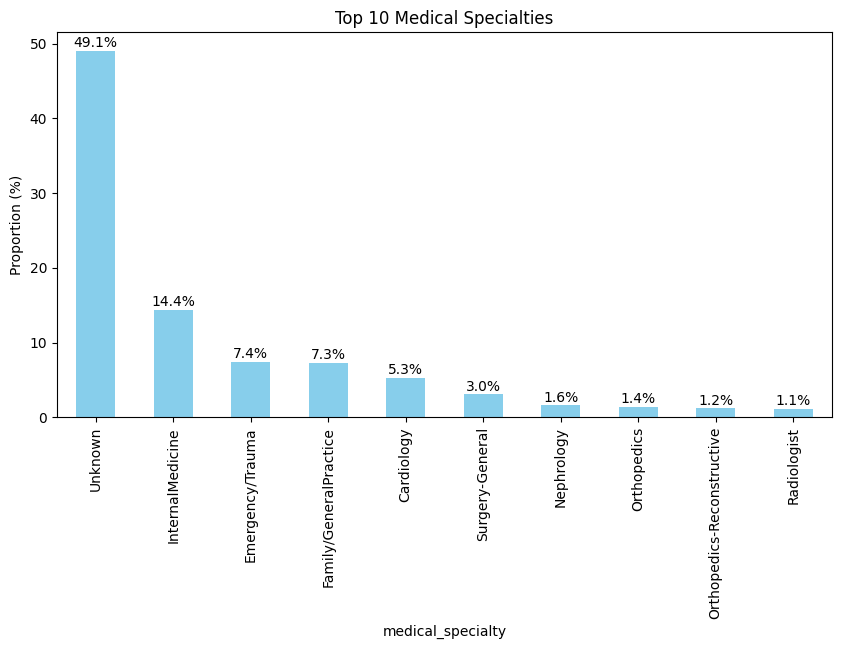

In [ ]:
#Medical Specialties
plt.figure(figsize=(10,5))

# Count persentage Top 10
top10 = df['medical_specialty'].value_counts(normalize=True).head(10) * 100

ax = top10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Medical Specialties')
plt.ylabel('Proportion (%)')

# Add data label
for i, value in enumerate(top10):
    ax.text(i, value + 0.5, f'{value:.1f}%', ha='center')

plt.show()


Insight:

Readmission is most influenced by a combination of clinical and historical factors, not a single variable.
Patients with:
A history of repeated hospitalizations,
Long length of stay and high number of medications,
Chronic diagnoses (especially diabetes and other comorbidities),
Certain hospital admission and discharge patterns, are at highest risk for readmission.


# Conclusion


1.Most patients do not get readmitted (around 53%), while only 11.16% return within 30 days.

2.Gender and age do not significantly influence readmission in diabetes patients, Demographic factors are not key predictors.

3.Patients show high clinical complexity
       Time in hospital with median 4, showing relatively short stay in hospital.
       Many lab procedures with median 44, showing severe or chronic cases.
       8 diagnoses per patient based on median, indicating high comorbidity burden.
       Number of medication with median 15

4.Outpatient follow-up is low (many zeros in outpatient visits),
      Patients often enter hospital   through acute routes (Emergency/Inpatient)

5.Weak direct correlation for all medical column with readmission

# Recommendation

1.Strengthen Post Discharge & Continue of Care
Mandatory follow-up scheduling before discharge
Telemedicine or nurse follow-ups for high-risk patients
Integrate Family/General Practice into follow-up pathway

2.Manage High-Complexity Patients
Identify patients with:
High number of medications
Many diagnoses
Long hospital stays
Apply chronic care management & pharmacy review (reduce polypharmacy risk)

3.Improve Data Quality
Fix Unknown specialty documentation
Track discharge disposition for accountability


In [ ]:
df['patient_nbr'].nunique()

71515

In [ ]:
df['patient_nbr'].shape[0]

101763

# Download File

In [1]:
#Export Columns
export_columns = [
    'patient_nbr', 'age', 'gender', 'medical_specialty','payer_code',
    'time_in_hospital','num_medications','num_lab_procedures',
    'number_diagnoses','number_emergency','number_inpatient','number_outpatient',
    'readmitted_flag','readmitted','diabetesMed','change'
]

df_final = df[export_columns]
df_final.to_csv("diabetes_readmission_final.csv", index=False)

NameError: name 'df' is not defined

In [ ]:
from google.colab import files
files.download("diabetes_readmission_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>